# Lab 3B: Implement multiple linear regression

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
dataset = pd.read_csv("50_Startups.csv")     #PSW

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.shape

(50, 5)

In [5]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Step 1: Divide dataframe into independent variable/ input and dependent / output features

In [7]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [8]:
print(X.head())
print(Y.head())

   R&D Spend  Administration  Marketing Spend       State
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida
3  144372.41       118671.85        383199.62    New York
4  142107.34        91391.77        366168.42     Florida
0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64


### Encoding the Categorical Data


In [9]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [10]:
# as we have 3 categories 
# so we use one hot encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct= ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [28]:
# print(X)

### Step 4: Split the data into training and testing

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [13]:
print(X_train.shape)
print(X_test.shape)

(40, 6)
(10, 6)


## Lets test linear regression model on training data

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [15]:
print("coefficient for state=California (B1) = ", regressor.coef_[0])
print("coefficient for state=Florida (B2) = " ,regressor.coef_[1])
print("coefficient for state=New York (B3) = ", regressor.coef_[2])
print("coefficient for R&D (B4) = " ,regressor.coef_[3])
print("coefficient for Adminstration (B5) = " ,regressor.coef_[4])
print("coefficient for Marketing Spent (B6) = ", regressor.coef_[5])
print("Initial Profit Intercept (B0) = " ,regressor.intercept_)

coefficient for state=California (B1) =  -285.1777694629406
coefficient for state=Florida (B2) =  297.56087646106005
coefficient for state=New York (B3) =  -12.383107002767183
coefficient for R&D (B4) =  0.7743420811125808
coefficient for Adminstration (B5) =  -0.009443695851296884
coefficient for Marketing Spent (B6) =  0.028918313285055255
Initial Profit Intercept (B0) =  49834.885073215744


#### Predicting the test result

In [16]:
ypred = regressor.predict(X_test)

In [17]:
print(ypred)
print(Y_test)

[114664.41715867  90593.1553162   75692.84151574  70221.88679651
 179790.25514874 171576.92018522  49753.58752029 102276.65888936
  58649.37795761  98272.02561131]
27    105008.31
35     96479.51
40     78239.91
38     81229.06
2     191050.39
3     182901.99
48     35673.41
29    101004.64
46     49490.75
31     97483.56
Name: Profit, dtype: float64


### Testing the single instance

**For example the profit of a startup with R&D spend=160000, Adminstration Spend= 130000, Marketing Spend = 300000 State='California'**

I/P : [1,0,0, 160000, 130000, 300000]

In [18]:
regressor.predict([[1,0,0, 160000, 130000, 300000]])    
# [1,0,0,160.....] === 1,0,0 = California, Florida, New York

array([180892.25380661])

# Accuracy of the model

In [19]:
# 1. Training Accuracy
tr = regressor.score(X_train,Y_train)
print("Training Accuracy = ", tr)

Training Accuracy =  0.942446542689397


In [20]:
# 1. Test Accuracy
te = regressor.score(X_test,Y_test)
print("Testing Accuracy = ", te)

Testing Accuracy =  0.9649618042060673


#### Build Residual Error Plot

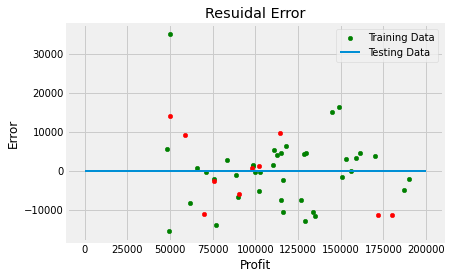

In [21]:
# Setting plot style
plt.style.use('fivethirtyeight')

plt.scatter(regressor.predict(X_train), regressor.predict(X_train)-Y_train, color = 'green', s=20)
plt.hlines(y=0, xmin=0,xmax=200000,linewidth=2)

# Plotting resuidal errors in testing data
plt.scatter(regressor.predict(X_test), regressor.predict(X_test)-Y_test, color = 'red', s=20)
plt.hlines(y=0, xmin=0,xmax=200000,linewidth=2)
plt.legend(['Training Data', 'Testing Data'],loc='upper right')
plt.title("Resuidal Error")
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show()

### R^2 Score

In [22]:
from sklearn.metrics import r2_score
r2_score(Y_test,ypred)

0.9649618042060673

In [23]:
r2_score(regressor.predict(X),Y)

0.9439977800352345

In [25]:
print("Intercept: ", regressor.intercept_)
print("Coefficient: ", regressor.coef_)

Intercept:  49834.885073215744
Coefficient:  [-2.85177769e+02  2.97560876e+02 -1.23831070e+01  7.74342081e-01
 -9.44369585e-03  2.89183133e-02]


**Test Your Knowledge**

**Q]Predict profit for { R&D Spend = 300000, Administration Spend = 160000, Marketing Spend = 200000, State = Florida}**

In [26]:
regressor.predict([[0,1,0,300000,160000,200000]])

array([286707.74160425])

**Q] Change the random state**

In [33]:
# splitting into training and testing
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=57)

# linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [38]:
# model on testing data
ypred = regressor.predict(X_test)
ypred

array([101665.54137004, 115967.55312425, 116484.53520105, 154483.34482823,
        82520.71288925,  67442.66965265,  99153.93967286,  98982.68177633,
       134913.84345446,  96848.151744  ])

In [39]:
# Accuracy, R^2s
print("Training accuracy: ",regressor.score(X_train,Y_train) )
print("Testing accuracy: ",regressor.score(X_test,Y_test) )
print("R^2 score: ",r2_score(Y_test,ypred) )

Training accuracy:  0.9527776419169073
Testing accuracy:  0.9150323289393305
r2 score:  0.9150323289393305


In [40]:
# Predict profit for { R&D Spend = 300000, Administration Spend = 160000, Marketing Spend = 200000, State = Florida}
regressor.predict([[0,1,0,300000,160000,200000]])

array([294953.71027927])

In [41]:
# Intercept Coefficient
print("Intercept: ", regressor.intercept_)
print("Coefficient: ", regressor.coef_)

Intercept:  47299.244832003154
Coefficient:  [ 2.72986630e+02  2.14749984e+01 -2.94461629e+02  8.13783841e-01
 -8.93750473e-03  2.46391951e-02]
